# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Arifatul Hidayah
- **Email:** arifaaaa.hdyh@gmail.com
- **ID Dicoding:** arifatulhidayah

## Menentukan Pertanyaan Bisnis


1. Apa saja 10 produk dengan jumlah penjualan terbanyak dalam periode 2016-2018?
2. Sebutkan 10 Kota dan state yang memiliki pelanggan terbanyak pada 2016-2018?
3. Bagaimana tren jumlah transaksi dan total penjualan dari tahun 2016 hingga 2018?
4. Siapa penjual dengan total revenue tertinggi selama 2016-2018, berada di daerah mana, dan produk terlarisnya apa?
5. Berdasarkan analisis teks dari ulasan pelanggan tahun 2016-2018, komentar apa yang paling sering disebut dalam ulasan?


## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
customers = pd.read_csv('/content/olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation = pd.read_csv('/content/olist_geolocation_dataset.csv')
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
orderitems = pd.read_csv('/content/olist_order_items_dataset.csv')
orderitems.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
orderpayments = pd.read_csv('/content/olist_order_payments_dataset.csv')
orderpayments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
orderreviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')
orderreviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
orders = pd.read_csv('/content/olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
products = pd.read_csv('/content/olist_products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers = pd.read_csv('/content/olist_sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
productcategory = pd.read_csv('/content/product_category_name_translation.csv')
productcategory.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
states = pd.read_excel('/content/state.xlsx')
states.head()

,customer_state,state_name
0,AC,Acre
1,AL,Alagoas
2,AM,Amazonas
3,AP,Amapá
4,BA,Bahia


**Insight:**


*   Dataset terdiri dari beberapa file yang saling berhubungan
(customers, orders, products, payments, reviews, dll.)
*   Ada dataset yang menggunakan bahasa Portugis (Brazil) seperti pada dataset product dan comments yang dapat di translate ke bahasa Inggris
*   Kolom customer_state pada data customers berupa singkatan yang perlu diketahui singkatannya, seperti SP = Sao Paulo, dst



### Assessing Data

**Assessing Data Customers**

In [13]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
customers.isna().sum()


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [15]:
customers.duplicated().sum()

0

In [16]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Assessing Data Geolocation**

In [17]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [18]:
geolocation.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [19]:
geolocation.duplicated().sum()

261831

In [20]:
geolocation.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


**Assessing Data Order Items**

In [21]:
orderitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [22]:
orderitems.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [23]:
orderitems.duplicated().sum()

0

In [24]:
orderitems.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Assessing Data Order Payments**

In [25]:
orderpayments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [26]:
orderpayments.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [27]:
orderpayments.duplicated().sum()

0

In [28]:
orderpayments.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


**Assessing Data Order Reviews**

In [29]:
orderreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [30]:
orderreviews.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0




*   Terdapat missing value, namun ini tidak perlu dihilangkan karena customer tidak mengisi comment namun isi review score, sehingga tidak mengganggu analisis yang berarti




In [31]:
orderreviews.duplicated().sum()

0

In [32]:
orderreviews.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


**Assessing Data Orders**

In [33]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [34]:
orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0



Keterangan:
*   pada order_status terdapat canceled dan delivered, sehingga ada missing value pada delivered date karena ada order status yang canceled



In [35]:
orders.duplicated().sum()

0

In [36]:
orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Assessing Data Products**

In [37]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [38]:
products.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [39]:
products.duplicated().sum()

0

In [40]:
products.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


**Assessing Data Sellers**

In [41]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [42]:
sellers.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [43]:
sellers.duplicated().sum()

0

In [44]:
sellers.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Assessing Data Products Category**

In [45]:
productcategory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [46]:
productcategory.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [47]:
productcategory.duplicated().sum()

0

In [48]:
productcategory.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
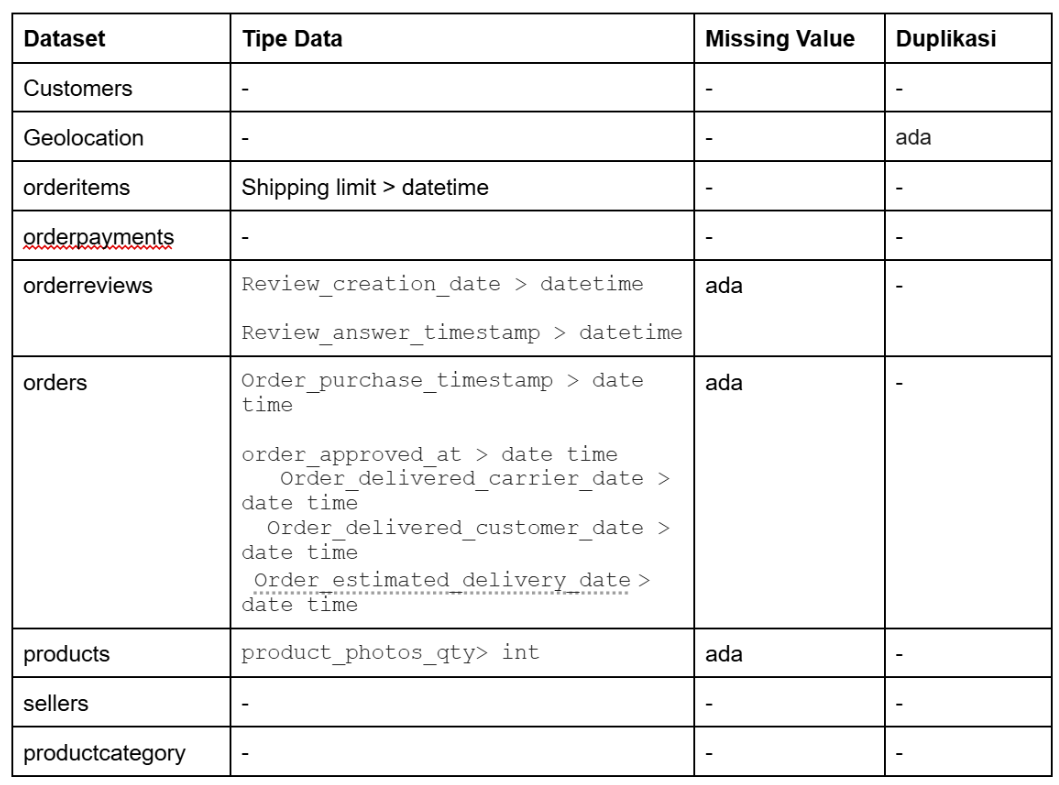

### Cleaning Data

**Cleaning Data Geolocaation**

In [49]:
"""
menghilangkan duplikasi
"""
geolocation.drop_duplicates(inplace=True)

In [50]:
geolocation.duplicated().sum()

0

In [51]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


**Cleaning Data Orderitems**

In [52]:
"""
mengubah tipe data kolom shipping_limit_date menjadi datetime
"""
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  orderitems[column] = pd.to_datetime(orderitems[column])

In [53]:
orderitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Cleaning Data Orderreviews**

In [54]:
'''
mengubah tipe data kolom review_creation_date dan review_answer_timestamp menjadi datetime
'''
datetime_columns = [ "review_creation_date","review_answer_timestamp"]

for column in datetime_columns:
  orderreviews[column] = pd.to_datetime(orderreviews[column])

In [55]:
orderreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


**Cleaning Data orders**

In [56]:
'''
mengubah tipe data kolom order_purchase_timestamp, order_approved_at,
order_delivered_carrier_date, order_delivered_customer_date,
order_estimated_delivery_date menjadi datetime
'''
datetime_columns = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date",
                    "order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_columns:
  orders[column] = pd.to_datetime(orders[column])

In [57]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [58]:
orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Sebelum mengambil keputusan untuk mengatasi missing value, dataset orders diEDA terlebih dahulu

In [59]:
"""
melihat data yang tidak memiliki nilai null pada kolom order_approved_at
"""
print(orders[orders['order_approved_at'].notnull()])


                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0       

Berdasarkan output, yang memiliki tidak nilai Null untuk kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date mayoritas karena order_status = delivered

In [60]:
"""
melihat data yang memiliki nilai null pada kolom order_approved_at
"""
print(orders[orders['order_approved_at'].isnull()])


                               order_id                       customer_id  \
1130   00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
1801   ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   
1868   df8282afe61008dc26c6c31011474d02  aa797b187b5466bc6925aaaa4bb3bed1   
2029   8d4c637f1accf7a88a4555f02741e606  b1dd715db389a2077f43174e7a675d07   
2161   7a9d4c7f9b068337875b95465330f2fc  7f71ae48074c0cfec9195f88fcbfac55   
...                                 ...                               ...   
97696  5a00b4d35edffc56b825c3646a99ba9d  6a3bdf004ca96338fb5fad1b8d93c2e6   
98415  227c804e2a44760671a6a5697ea549e4  62e7477e75e542243ee62a0ba73f410f   
98909  e49e7ce1471b4693482d40c2bd3ad196  e4e7ab3f449aeb401f0216f86c2104db   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   

      order_status order_purchase_timestamp order_approved_at  \
1130      

Insight :

*   Berdasarkan output, yang memiliki nilai Null untuk kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date mayoritas karena order_status = canceled. Sehinggan karena status pengiriman canceled/gagal maka kolom tanggal kirimnya tidak ada / null




In [61]:
print(orders[orders['order_status'] == 'canceled'])

                               order_id                       customer_id  \
397    1b9ecfe83cdc259250e1a8aca174f0ad  6d6b50b66d79f80827b6d96751528d30   
613    714fb133a6730ab81fa1d3c1b2007291  e3fe72696c4713d64d3c10afe71e75ed   
1058   3a129877493c8189c59c60eb71d97c29  0913cdce793684e52bbfac69d87e91fd   
1130   00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
1801   ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   
...                                 ...                               ...   
98791  b159d0ce7cd881052da94fa165617b05  e0c3bc5ce0836b975d6b2a8ce7bb0e3e   
98909  e49e7ce1471b4693482d40c2bd3ad196  e4e7ab3f449aeb401f0216f86c2104db   
99143  6560fb10610771449cb0463c5ba12199  0d07d0a588caf93cc66b7a8aff86d2fe   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   

      order_status order_purchase_timestamp   order_approved_at  \
397     

**Cleaning Data Product**

In [62]:
'''
mengubah tipe data kolom product_photos_qty menjadi integer
'''

products['product_photos_qty'] = pd.to_numeric(products['product_photos_qty'], errors='coerce').astype('Int64')

In [63]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  Int64  
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: Int64(1), float64(6), object(2)
memory usage: 2.3+ MB


**Insight:**
- Data Duplikasi, missing values, dan kesalahan tipe data, apabila tidak di cek dan tidak ditangani dapat menyebabkan bias atau hasil yang salah dalam analisis selanjutnya.
- Missing value yang tidak mengganggu analisis data seperti pada kasus order status yang cancel, tidak perlu diekskusi karena dapat dimanfaatkan untuk analisis lebih lanjut nantinya.

# Exploratory Data Analysis (EDA)

### Explore Data Customers

In [64]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [65]:
'''5 customer terbanyak berdasarkan state'''

totalcust_by_state = customers.groupby('customer_state')['customer_id'].count().reset_index()
totalcust_by_state.rename(columns={'customer_id': 'total_customers'}, inplace=True)

top5_custbystate = totalcust_by_state.sort_values('total_customers', ascending=False).head(5)
top5_custbystate


,customer_state,total_customers
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045


In [66]:
#top 10 customer terbanyak berdasarkan citynya

totalcust_by_city = customers.groupby(['customer_city', 'customer_state'])['customer_id'].count().reset_index()
totalcust_by_city.rename(columns={'customer_id': 'total_customers'}, inplace=True)
totalcust_by_city = totalcust_by_city.sort_values('total_customers', ascending=False).head(10)
totalcust_by_city


,customer_city,customer_state,total_customers
3758,sao paulo,SP,15540
3281,rio de janeiro,RJ,6882
469,belo horizonte,MG,2773
587,brasilia,DF,2131
1187,curitiba,PR,1521
739,campinas,SP,1444
3080,porto alegre,RS,1379
3375,salvador,BA,1245
1587,guarulhos,SP,1189
3574,sao bernardo do campo,SP,938


### Explore Data product

In [67]:
orderitems.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [68]:
#jumlah penjualan terbanyak berdasarkan product_category

# menggabungkan dataframe
df = pd.merge(orderitems, products, on='product_id', how='left')
df = pd.merge(df, productcategory, on='product_category_name', how='left')

# Hitung jumlah penjualan per kategori produk
sales_by_category = df.groupby('product_category_name_english')['order_item_id'].sum().reset_index()
sales_by_category.rename(columns={'order_item_id': 'total_penjualan'}, inplace=True)

# Urutkan berdasarkan jumlah penjualan terbanyak
sales_by_category = sales_by_category.sort_values(by='total_penjualan', ascending=False)

print(sales_by_category[['product_category_name_english', 'total_penjualan']])

   product_category_name_english  total_penjualan
7                 bed_bath_table            13665
39               furniture_decor            11540
43                 health_beauty            11081
65                sports_leisure             9932
15         computers_accessories             9874
..                           ...              ...
3          arts_and_craftmanship               26
11             cds_dvds_musicals               16
52                    la_cuisine               16
29     fashion_childrens_clothes                8
61         security_and_services                2

[71 rows x 2 columns]


In [69]:
# freigh value terbanyak

# Gabungkan dataframe yang dibutuhkan
df = pd.merge(orderitems, products, on='product_id', how='left')
df = pd.merge(df, productcategory, on='product_category_name', how='left')

# Hitung total freight value per kategori produk
freight_by_category = df.groupby('product_category_name_english')['freight_value'].sum().reset_index()

# Urutkan berdasarkan freight value terbanyak
freight_by_category = freight_by_category.sort_values(by='freight_value', ascending=False)

print(freight_by_category)


   product_category_name_english  freight_value
7                 bed_bath_table      204693.04
43                 health_beauty      182566.73
39               furniture_decor      172749.30
65                sports_leisure      168607.51
15         computers_accessories      147318.08
..                           ...            ...
3          arts_and_craftmanship         370.13
52                    la_cuisine         333.55
11             cds_dvds_musicals         224.99
29     fashion_childrens_clothes          95.51
61         security_and_services          41.22

[71 rows x 2 columns]


In [70]:
# produk dengan revenue tertinggi

import pandas as pd
# Gabungkan dataframe yang dibutuhkan
df = pd.merge(orderitems, products, on='product_id', how='left')
df = pd.merge(df, productcategory, on='product_category_name', how='left')

# Hitung total penjualan per kategori produk
sales_by_category = df.groupby('product_category_name_english')['price'].sum().reset_index()
sales_by_category.rename(columns={'price': 'total_revenue'}, inplace=True)
# Urutkan berdasarkan total penjualan terbanyak
sales_by_category = sales_by_category.sort_values(by='total_revenue', ascending=False)

# Tampilkan kategori produk dengan total penjualan terbanyak
print("\nKategori produk dengan revenue terbanyak:")
print(sales_by_category.head(10))



Kategori produk dengan revenue terbanyak:
   product_category_name_english  total_revenue
43                 health_beauty     1258681.34
70                 watches_gifts     1205005.68
7                 bed_bath_table     1036988.68
65                sports_leisure      988048.97
15         computers_accessories      911954.32
39               furniture_decor      729762.49
20                    cool_stuff      635290.85
49                    housewares      632248.66
5                           auto      592720.11
42                  garden_tools      485256.46


In [71]:
# product dengan revenue terbanyak tapi freightnya paling sedikit(ringan)

# Gabungkan dataframe yang dibutuhkan
df = pd.merge(orderitems, products, on='product_id', how='left')
df = pd.merge(df, productcategory, on='product_category_name', how='left')

# Hitung total penjualan dan freight per kategori produk
sales_freight_by_category = df.groupby('product_category_name_english').agg({'price': 'sum', 'freight_value': 'sum'}).reset_index()

# Urutkan berdasarkan total penjualan terbanyak dan freight tersedikit
sales_freight_by_category = sales_freight_by_category.sort_values(by=['price', 'freight_value'], ascending=[False, True])

# Tampilkan kategori produk dengan total penjualan terbanyak dan freight tersedikit
print("\nKategori produk dengan revenue terbanyak dan freight tersedikit:")
print(sales_freight_by_category.head(5))



Kategori produk dengan revenue terbanyak dan freight tersedikit:
   product_category_name_english       price  freight_value
43                 health_beauty  1258681.34      182566.73
70                 watches_gifts  1205005.68      100535.93
7                 bed_bath_table  1036988.68      204693.04
65                sports_leisure   988048.97      168607.51
15         computers_accessories   911954.32      147318.08


In [72]:
# penjualan healthy beauty terbanyak customer daerah mana

# Gabungkan dataframe yang dibutuhkan
df = pd.merge(orders, customers, on='customer_id', how='left')
df = pd.merge(df, orderitems, on='order_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')
df = pd.merge(df, productcategory, on='product_category_name', how='left')

# Filter data untuk kategori 'health_beauty'
health_beauty_df = df[df['product_category_name_english'] == 'health_beauty']

# Hitung jumlah penjualan per kota customer
sales_by_city = health_beauty_df.groupby(['customer_city', 'customer_state'])['order_id'].count().reset_index()
sales_by_city.rename(columns={'order_id': 'total_sales'}, inplace=True)

# Urutkan berdasarkan jumlah penjualan terbanyak
top_sales_by_city = sales_by_city.sort_values(by='total_sales', ascending=False)

# Tampilkan hasil
print(top_sales_by_city[['customer_city', 'customer_state', 'total_sales']].head(10))


              customer_city customer_state  total_sales
1347              sao paulo             SP         1753
1178         rio de janeiro             RJ          572
170          belo horizonte             MG          274
217                brasilia             DF          246
281                campinas             SP          148
1215               salvador             BA          140
446                curitiba             PR          138
584               guarulhos             SP          130
1116           porto alegre             RS          118
1285  sao bernardo do campo             SP           98


In [73]:
# penjualan healty_beauty dari tahun ke tahun

import pandas as pd
# Gabungkan dataframe yang dibutuhkan
df = pd.merge(orders, customers, on='customer_id', how='left')
df = pd.merge(df, orderitems, on='order_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')
df = pd.merge(df, productcategory, on='product_category_name', how='left')

# Filter data untuk kategori 'health_beauty'
health_beauty_df = df[df['product_category_name_english'] == 'health_beauty']

# Konversi kolom tanggal pembelian ke tipe datetime jika belum
health_beauty_df['order_purchase_timestamp'] = pd.to_datetime(health_beauty_df['order_purchase_timestamp'])

# Buat kolom tahun
health_beauty_df['year'] = health_beauty_df['order_purchase_timestamp'].dt.year

# Hitung jumlah penjualan per tahun
sales_by_year = health_beauty_df.groupby('year')['order_id'].count().reset_index()
sales_by_year.rename(columns={'order_id': 'total_sales'}, inplace=True)

# Tampilkan hasil
sales_by_year


<ipython-input-73-d1a95b4c42bf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_beauty_df['order_purchase_timestamp'] = pd.to_datetime(health_beauty_df['order_purchase_timestamp'])
<ipython-input-73-d1a95b4c42bf>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_beauty_df['year'] = health_beauty_df['order_purchase_timestamp'].dt.year


,year,total_sales
0,2016,51
1,2017,3668
2,2018,5951


In [74]:
# penjualan healthy_beaty dari bulan bulan

# Gabungkan dataframe yang dibutuhkan
df = pd.merge(orders, customers, on='customer_id', how='left')
df = pd.merge(df, orderitems, on='order_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')
df = pd.merge(df, productcategory, on='product_category_name', how='left')

# Filter data untuk kategori 'health_beauty'
health_beauty_df = df[df['product_category_name_english'] == 'health_beauty']
health_beauty_df = health_beauty_df[(health_beauty_df['order_purchase_timestamp'].dt.year >= 2016) & (health_beauty_df['order_purchase_timestamp'].dt.year <= 2018)]

# Konversi kolom tanggal pembelian ke tipe datetime jika belum
health_beauty_df['order_purchase_timestamp'] = pd.to_datetime(health_beauty_df['order_purchase_timestamp'])

# Buat kolom bulan dan tahun
health_beauty_df['month'] = health_beauty_df['order_purchase_timestamp'].dt.month
health_beauty_df['year'] = health_beauty_df['order_purchase_timestamp'].dt.year

health_beautyterjual = health_beauty_df.groupby(['year', 'month'])['order_id'].count().reset_index()
health_beautyterjual.rename(columns={'order_id': 'total_terjual'}, inplace=True)
health_beautyterjual


,year,month,total_terjual
0,2016,9,3
1,2016,10,48
2,2017,1,85
3,2017,2,166
4,2017,3,211
5,2017,4,189
6,2017,5,290
7,2017,6,260
8,2017,7,316
9,2017,8,360


In [75]:
# tren penjualan produk perbulan

# Gabungkan dataframe yang dibutuhkan
df = pd.merge(orders, customers, on='customer_id', how='left')
df = pd.merge(df, orderitems, on='order_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')
df = pd.merge(df, productcategory, on='product_category_name', how='left')

# Filter data untuk tahun 2016-2018
df = df[(df['order_purchase_timestamp'].dt.year >= 2016) & (df['order_purchase_timestamp'].dt.year <= 2018)]

# Buat kolom bulan dan tahun
df['month'] = df['order_purchase_timestamp'].dt.month
df['year'] = df['order_purchase_timestamp'].dt.year

# Hitung jumlah penjualan per bulan dan tahun
sales_by_month_year = df.groupby(['year', 'month'])['order_id'].count().reset_index()
sales_by_month_year.rename(columns={'order_id': 'total_produk'}, inplace=True)

print(sales_by_month_year)


    year  month  total_produk
0   2016      9             7
1   2016     10           379
2   2016     12             1
3   2017      1           966
4   2017      2          1998
5   2017      3          3041
6   2017      4          2697
7   2017      5          4176
8   2017      6          3611
9   2017      7          4576
10  2017      8          4948
11  2017      9          4873
12  2017     10          5385
13  2017     11          8758
14  2017     12          6357
15  2018      1          8257
16  2018      2          7706
17  2018      3          8240
18  2018      4          7980
19  2018      5          7945
20  2018      6          7085
21  2018      7          7111
22  2018      8          7308
23  2018      9            16
24  2018     10             4


In [76]:
# tren penjualan berdasarkan revenuenya perbulan

# Gabungkan dataframe yang dibutuhkan
df = pd.merge(orders, customers, on='customer_id', how='left')
df = pd.merge(df, orderitems, on='order_id', how='left')

# Filter data untuk tahun 2016-2018
df = df[(df['order_purchase_timestamp'].dt.year >= 2016) & (df['order_purchase_timestamp'].dt.year <= 2018)]

# Buat kolom bulan dan tahun
df['month'] = df['order_purchase_timestamp'].dt.month
df['year'] = df['order_purchase_timestamp'].dt.year

# Hitung revenue per bulan dan tahun
revenue_by_month= df.groupby(['year', 'month'])['price'].sum().reset_index()
revenue_by_month.rename(columns={'price': 'total_revenue'}, inplace=True)

revenue_by_month


,year,month,total_revenue
0,2016,9,267.36
1,2016,10,49507.66
2,2016,12,10.90
3,2017,1,120312.87
4,2017,2,247303.02
5,2017,3,374344.30
6,2017,4,359927.23
7,2017,5,506071.14
8,2017,6,433038.60
9,2017,7,498031.48


In [77]:
# pada bulan 11 2017 penjualan produk yang terbanyak

# Gabungkan dataframe yang dibutuhkan
df = pd.merge(orders, customers, on='customer_id', how='left')
df = pd.merge(df, orderitems, on='order_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')
df = pd.merge(df, productcategory, on='product_category_name', how='left')

# Filter data untuk bulan November 2017
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df_november_2017 = df[(df['order_purchase_timestamp'].dt.year == 2017) & (df['order_purchase_timestamp'].dt.month == 11)]

# Hitung jumlah penjualan per kategori produk pada bulan November 2017
sales_by_category_nov_2017 = df_november_2017.groupby('product_category_name_english')['order_id'].count().reset_index()
sales_by_category_nov_2017.rename(columns={'order_id': 'total_product'}, inplace=True)

# Urutkan berdasarkan jumlah penjualan terbanyak
sales_by_category_nov_2017 = sales_by_category_nov_2017.sort_values(by='total_product', ascending=False)

sales_by_category_nov_2017.head(5)


,product_category_name_english,total_product
6,bed_bath_table,975
36,furniture_decor,783
59,sports_leisure,612
40,health_beauty,584
39,garden_tools,550


In [78]:
# bed_bath_table berdasarkan customer citynya

# Gabungkan dataframe yang dibutuhkan
df = pd.merge(orders, customers, on='customer_id', how='left')
df = pd.merge(df, orderitems, on='order_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')
df = pd.merge(df, productcategory, on='product_category_name', how='left')

# Filter data untuk kategori 'bed_bath_table'
bed_bath_table_df = df[df['product_category_name_english'] == 'bed_bath_table']

# Konversi kolom tanggal pembelian ke tipe datetime jika belum
bed_bath_table_df['order_purchase_timestamp'] = pd.to_datetime(bed_bath_table_df['order_purchase_timestamp'])

# Buat kolom bulan dan tahun
bed_bath_table_df['month'] = bed_bath_table_df['order_purchase_timestamp'].dt.month
bed_bath_table_df['year'] = bed_bath_table_df['order_purchase_timestamp'].dt.year

# Hitung jumlah penjualan per kota customer dan waktu
sales_by_city_time = bed_bath_table_df.groupby(['customer_city', 'customer_state', 'year', 'month'])['order_id'].count().reset_index()
sales_by_city_time.rename(columns={'order_id': 'total_product'}, inplace=True)

# Urutkan berdasarkan jumlah penjualan terbanyak
top_sales_by_city = sales_by_city_time.sort_values(by='total_product', ascending=False)
top_sales_by_city

<ipython-input-78-1c47f835d0b9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_bath_table_df['order_purchase_timestamp'] = pd.to_datetime(bed_bath_table_df['order_purchase_timestamp'])
<ipython-input-78-1c47f835d0b9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_bath_table_df['month'] = bed_bath_table_df['order_purchase_timestamp'].dt.month
<ipython-input-78-1c47f835d0b9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,customer_city,customer_state,year,month,total_product
3674,sao paulo,SP,2018,5,166
3673,sao paulo,SP,2018,4,155
3677,sao paulo,SP,2018,8,148
3668,sao paulo,SP,2017,11,148
3675,sao paulo,SP,2018,6,146
...,...,...,...,...,...
1740,itajobi,SP,2018,4,1
1741,itajuba,MG,2017,1,1
1743,itajuba,MG,2017,6,1
1744,itajuba,MG,2017,7,1


Insight : Berdasarkan berita, pada bulan mei 2018, terjadi kebakaran di gedung apartemen 26 lantai di Sao Paulo. Sehingga, make sense apabila pada bulan tersebut terjadi pembelian bed_bath_table dengan jumlah banyak

### Explore Data order_payment

In [79]:
# top 5 payment_type terbanyak

top_payment_types = orderpayments['payment_type'].value_counts().head(5)
top_payment_types


,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


Boleto adalah  metode pembayaran alternatif yang diatur oleh Bank Sentral Brasil

In [80]:
print(orderpayments['payment_type'].unique())

['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']


In [81]:
# payment value terbanyak

top_payment_values = orderpayments.groupby('payment_type')['payment_value'].sum()
top_payment_values = top_payment_values.sort_values(ascending=False)
top_payment_values


,payment_value
payment_type,
credit_card,12542084.19
boleto,2869361.27
voucher,379436.87
debit_card,217989.79
not_defined,0.00


### Explore Data orders

In [82]:
# Order_status = canceled terbanyak

# Gabungkan dataframe yang dibutuhkan
df = pd.merge(orders, customers, on='customer_id', how='left')
df = pd.merge(df, orderitems, on='order_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')
df = pd.merge(df, productcategory, on='product_category_name', how='left')

# Filter order status 'canceled'
canceled_orders = df[df['order_status'] == 'canceled']

# Group by product category and count occurrences, then sort
canceled_by_category = canceled_orders.groupby('product_category_name_english')['order_id'].count().reset_index()
canceled_by_category.rename(columns={'order_id': 'canceled_count'}, inplace=True)
canceled_by_category = canceled_by_category.sort_values(by='canceled_count', ascending=False)

# Get the top canceled product category
top_canceled_category = canceled_by_category.iloc[0]

# Extract month and year from order_purchase_timestamp
canceled_orders['order_purchase_month'] = canceled_orders['order_purchase_timestamp'].dt.month
canceled_orders['order_purchase_year'] = canceled_orders['order_purchase_timestamp'].dt.year

# Filter for the top canceled category
top_category_canceled = canceled_orders[canceled_orders['product_category_name_english'] == top_canceled_category['product_category_name_english']]

# Group by city, state, month, and year and count occurrences
locations_by_month_year = top_category_canceled.groupby(['customer_city', 'customer_state', 'order_purchase_month', 'order_purchase_year'])['order_id'].count().reset_index()
locations_by_month_year.rename(columns={'order_id':'canceled_count'}, inplace = True)
locations_by_month_year = locations_by_month_year.sort_values(by='canceled_count', ascending=False)

# Display the results
print(f"Top canceled product category: {top_canceled_category['product_category_name_english']} ({top_canceled_category['canceled_count']} orders)")
print("\nLocations, Months, and Years with the highest canceled order counts:")
locations_by_month_year


Top canceled product category: sports_leisure (51 orders)

Locations, Months, and Years with the highest canceled order counts:


<ipython-input-82-d2fd3a650cec>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled_orders['order_purchase_month'] = canceled_orders['order_purchase_timestamp'].dt.month
<ipython-input-82-d2fd3a650cec>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled_orders['order_purchase_year'] = canceled_orders['order_purchase_timestamp'].dt.year


,customer_city,customer_state,order_purchase_month,order_purchase_year,canceled_count
27,sao paulo,SP,3,2018,4
28,sao paulo,SP,4,2017,3
0,belo horizonte,MG,6,2018,2
33,sao paulo,SP,9,2017,2
29,sao paulo,SP,4,2018,2
12,joao pessoa,PB,7,2017,2
32,sao paulo,SP,8,2018,2
10,itajai,SC,7,2017,2
34,sao paulo,SP,10,2017,1
31,sao paulo,SP,8,2017,1


In [83]:
# order_status = canceled berdasarkan produk

# Gabungkan dataframe yang dibutuhkan
df = pd.merge(orders, customers, on='customer_id', how='left')
df = pd.merge(df, orderitems, on='order_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')
df = pd.merge(df, productcategory, on='product_category_name', how='left')

# Filter order status 'canceled'
canceled_orders = df[df['order_status'] == 'canceled']

# Group by product category and count occurrences, then sort
canceled_by_category = canceled_orders.groupby('product_category_name_english')['order_id'].count().reset_index()
canceled_by_category.rename(columns={'order_id': 'canceled_count'}, inplace=True)
canceled_by_category = canceled_by_category.sort_values(by='canceled_count', ascending=False)
canceled_by_category


,product_category_name_english,canceled_count
41,sports_leisure,51
32,housewares,49
8,computers_accessories,46
28,health_beauty,36
25,furniture_decor,36
44,toys,34
3,auto,30
45,watches_gifts,21
4,baby,20
27,garden_tools,19


### Explore Data Sellers

In [84]:
# 5 sellers dengan revenue terbanyak

# Gabungkan dataframe yang dibutuhkan
df = pd.merge(orders, customers, on='customer_id', how='left')
df = pd.merge(df, orderitems, on='order_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')
df = pd.merge(df, productcategory, on='product_category_name', how='left')

# Kelompokkan berdasarkan penjual dan nama produk, lalu hitung total penjualan
sales_by_seller_product = df.groupby(['seller_id', 'product_category_name_english'])['price'].sum().reset_index()

# Urutkan berdasarkan total penjualan terbanyak
sales_by_seller_product = sales_by_seller_product.sort_values('price', ascending=False)

top_sellers = sales_by_seller_product.groupby('seller_id').head(1).sort_values('price', ascending=False).head(10)

# Tampilkan hasil
print(top_sellers[['seller_id', 'product_category_name_english', 'price']])


                             seller_id product_category_name_english  \
1770  4869f7a5dfa277a7dca6462dcf3b52b2                 watches_gifts   
6197  fa1c13f2614d7b5c4749cbc52fecda94                 watches_gifts   
3153  7c67e1448b00f6e969d365cea6b010ab              office_furniture   
3222  7e93a43ef30c4f03f38b393420bc753a                 watches_gifts   
2079  53243585a1d6dc2643021fd1853d8905                     computers   
1812  4a3ca9315b744ce9f8e9374361493884                bed_bath_table   
5370  da8622b14eb17ae2831f4ac5b9dab84a                bed_bath_table   
3099  7a67c85e85bb2ce8582c35f2203ad736                    cool_stuff   
389   1025f0e2d44d7041d6cf58b6550e0bfa               furniture_decor   
778   1f50f920176fa81dab994f9023523100                  garden_tools   

          price  
1770  201071.73  
6197  192092.74  
3153  172959.66  
3222  169768.06  
2079  166871.75  
1812  165219.25  
5370  152307.80  
3099  135413.55  
389   111530.45  
778   103133.11  


In [85]:
# seller dengan produk penjualan terbanyak

# Gabungkan dataframe yang dibutuhkan
df = pd.merge(orders, customers, on='customer_id', how='left')
df = pd.merge(df, orderitems, on='order_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')
df = pd.merge(df, productcategory, on='product_category_name', how='left')

# Kelompokkan berdasarkan penjual dan hitung jumlah produk yang terjual
sales_by_seller = df.groupby('seller_id')['order_id'].count().reset_index()
sales_by_seller.rename(columns={'order_id': 'total_products_sold'}, inplace=True)

# Urutkan berdasarkan jumlah produk yang terjual terbanyak
top_10_sellers = sales_by_seller.sort_values('total_products_sold', ascending=False).head(10)

# Gabungkan kembali dengan dataframe awal untuk mendapatkan informasi produk
top_10_sellers = pd.merge(top_10_sellers, df, on='seller_id', how='left')
print(top_10_sellers[['seller_id', 'product_category_name_english',
                      'total_products_sold']].drop_duplicates().head(10))


                             seller_id product_category_name_english  \
0     6560211a19b47992c3666cc44a7e94c0                 watches_gifts   
3     6560211a19b47992c3666cc44a7e94c0      fashion_bags_accessories   
5     6560211a19b47992c3666cc44a7e94c0                         audio   
7     6560211a19b47992c3666cc44a7e94c0                sports_leisure   
69    6560211a19b47992c3666cc44a7e94c0         computers_accessories   
502   6560211a19b47992c3666cc44a7e94c0                     perfumery   
1491  6560211a19b47992c3666cc44a7e94c0     construction_tools_safety   
2033  4a3ca9315b744ce9f8e9374361493884                bed_bath_table   
2034  4a3ca9315b744ce9f8e9374361493884               furniture_decor   
2038  4a3ca9315b744ce9f8e9374361493884                  home_confort   

      total_products_sold  
0                    2033  
3                    2033  
5                    2033  
7                    2033  
69                   2033  
502                  2033  
1491       

### Explore Data Orderreviews

In [86]:
# comment terbanyak pada orderreviews
review_comment_counts = orderreviews['review_comment_message'].value_counts()
print(review_comment_counts.head(10))


review_comment_message
Muito bom    230
Bom          189
muito bom    122
bom          107
Recomendo    100
Otimo         99
otimo         96
Ótimo         77
Ótimo         74
Ok            72
Name: count, dtype: int64


In [87]:
# jumlah review berdasarkan review scorenya

review_counts = orderreviews.groupby('review_score')['review_id'].count().reset_index()
review_counts.rename(columns={'review_id': 'review_count'}, inplace=True)
review_counts


,review_score,review_count
0,1,11424
1,2,3151
2,3,8179
3,4,19142
4,5,57328


In [88]:
# isi comment paling sering berdasarkan jumlah review

review_comments_by_score = orderreviews.groupby('review_score')['review_comment_message'].value_counts()

print("\n comments for 1-star reviews:")
print(review_comments_by_score[1])

print("\n comments for 4-star reviews:")
print(review_comments_by_score[4])

print("\n comments for 5-star reviews:")
print(review_comments_by_score[5])



 comments for 1-star reviews:
review_comment_message
Não recebi o produto                                                                          30
Não recebi o produto                                                                          12
Não recebi                                                                                    11
Ainda não recebi                                                                              10
Ainda não recebi o produto                                                                    10
                                                                                              ..
é muito fino                                                                                   1
é uma cadeira que fica o parafuso machucando as nadegas. Não comprem!! arrependimentototal     1
ótimo e recomendo nota oito e meio.                                                            1
👎                                                                        

Insight  :


*   1-star : mayoritas karena produk belum diterima
*   4-star & 5-star : sangat bagus, bagus, dan merekomendasikan




In [89]:
# produk yang terjual dengan ulasan bintang 1

df = pd.merge(df, orderreviews, on='order_id', how='left')

# Filter for products with 1-star reviews
one_star_products = df[df['review_score'] == 1]

# Group by product category and count occurrences
one_star_products_by_category = one_star_products.groupby('product_category_name_english')['order_id'].count().reset_index()
one_star_products_by_category.rename(columns={'order_id': 'one_star_count'}, inplace=True)
one_star_products_by_category = one_star_products_by_category.sort_values(by='one_star_count', ascending=False)

# Display the results
one_star_products_by_category


,product_category_name_english,one_star_count
7,bed_bath_table,1614
38,furniture_decor,1260
14,computers_accessories,1174
42,health_beauty,1081
64,sports_leisure,1028
...,...,...
3,arts_and_craftmanship,3
31,fashion_sport,2
34,flowers,2
60,security_and_services,1


In [90]:
# isi comment terbanyak dari produk bed_bath_ table dan furniture decor dengan ulasan bintang 1

filtered_df = df[
    (df['product_category_name_english'].isin(['bed_bath_table', 'furniture_decor'])) &(df['review_score'] == 1)
]

# Display the comments for the filtered products
print(filtered_df['review_comment_message'])

8                                                       NaN
62                                               Não recebi
112                                                     NaN
125       Não recebi o produto até a presente data na mi...
146                Produto não corresponde às expectativas 
                                ...                        
113975                         COMPREI 04, MAS SO RECEBI 02
113976                         COMPREI 04, MAS SO RECEBI 02
113977                         COMPREI 04, MAS SO RECEBI 02
113978                         COMPREI 04, MAS SO RECEBI 02
114050    Não gostei imaginei que era uma cortina de tec...
Name: review_comment_message, Length: 2874, dtype: object


Keterangan :
- Saya tidak menerima
- Saya belum menerima produk sampai saat ini di...
- Produk tidak memenuhi harapan
- SAYA MEMBELI 04, TAPI SAYA HANYA MENERIMA 02
- Saya tidak menyukainya, saya membayangkan itu adalah tirai kain...



In [91]:
# penjual dengan ulasan bintang 1 terbanyak

# Gabungkan dataframe yang dibutuhkan
df = pd.merge(orders, customers, on='customer_id', how='left')
df = pd.merge(df, orderitems, on='order_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')
df = pd.merge(df, sellers, on='seller_id', how='left') # Tambahkan merge dengan dataframe sellers
df = pd.merge(df, orderreviews, on='order_id', how='left') # Tambahkan merge dengan dataframe orderreviews
df = pd.merge(df, productcategory, on='product_category_name', how='left') # Tambahkan merge dengan dataframe productcategory


# Filter untuk ulasan bintang 1
df_one_star = df[df['review_score'] == 1]

# Kelompokkan berdasarkan seller_id dan hitung jumlah ulasan bintang 1
seller_one_star_counts = df_one_star.groupby('seller_id')['order_id'].count().reset_index()
seller_one_star_counts.rename(columns={'order_id': 'one_star_review_count'}, inplace=True)

# Gabungkan kembali dengan dataframe utama
df = pd.merge(df, seller_one_star_counts, on='seller_id', how='left')

# Kelompokkan berdasarkan seller_id dan hitung jumlah produk terjual
seller_sales_counts = df.groupby('seller_id')['product_id'].count().reset_index()
seller_sales_counts.rename(columns={'product_id': 'total_products_sold'}, inplace=True)

# Gabungkan kembali dengan dataframe utama
df = pd.merge(df, seller_sales_counts, on='seller_id', how='left')

# Urutkan berdasarkan jumlah produk terjual dan jumlah ulasan bintang 1
df_sorted = df.sort_values(by=['total_products_sold', 'one_star_review_count'], ascending=[False, False])

result = df_sorted[['seller_id', 'seller_city', 'seller_state', 'product_category_name_english', 'total_products_sold', 'one_star_review_count']].drop_duplicates(subset='seller_id').head(10)
result

,seller_id,seller_city,seller_state,product_category_name_english,total_products_sold,one_star_review_count
92,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,watches_gifts,2039.0,267.0
98,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,bed_bath_table,2009.0,294.0
168,1f50f920176fa81dab994f9023523100,sao jose do rio preto,SP,garden_tools,1940.0,282.0
22,cc419e0650a3c5ba77189a1882b7556a,santo andre,SP,health_beauty,1819.0,215.0
138,da8622b14eb17ae2831f4ac5b9dab84a,piracicaba,SP,bed_bath_table,1574.0,177.0
37,955fee9216a65b617aa5c0531780ce60,sao paulo,SP,garden_tools,1501.0,152.0
57,1025f0e2d44d7041d6cf58b6550e0bfa,sao paulo,SP,furniture_decor,1443.0,235.0
9,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,SP,office_furniture,1375.0,323.0
18,ea8482cd71df3c1969d7b9473ff13abc,sao paulo,SP,telephony,1204.0,149.0
327,7a67c85e85bb2ce8582c35f2203ad736,sao paulo,SP,cool_stuff,1175.0,90.0


In [92]:
# seller dengan ulasan bintang 1 terbanyak

# Filter for 1-star reviews
one_star_reviews = df[df['review_score'] == 1]

# Group by seller and count the number of 1-star reviews
seller_one_star_counts = one_star_reviews.groupby('seller_id')['review_score'].count().reset_index()
seller_one_star_counts.rename(columns={'review_score': 'one_star_count'}, inplace=True)

# Sort by the number of 1-star reviews in descending order
seller_one_star_counts = seller_one_star_counts.sort_values('one_star_count', ascending=False)

print(seller_one_star_counts.head(10))

                             seller_id  one_star_count
866   7c67e1448b00f6e969d365cea6b010ab             323
490   4a3ca9315b744ce9f8e9374361493884             294
210   1f50f920176fa81dab994f9023523100             282
695   6560211a19b47992c3666cc44a7e94c0             267
106   1025f0e2d44d7041d6cf58b6550e0bfa             235
1410  cc419e0650a3c5ba77189a1882b7556a             215
1504  da8622b14eb17ae2831f4ac5b9dab84a             177
1041  955fee9216a65b617aa5c0531780ce60             152
1620  ea8482cd71df3c1969d7b9473ff13abc             149
975   8b321bb669392f5163d04c59e235e066             132


# Visualization & Explanatory Analysis

### Pertanyaan 1: Apa saja 10 produk dengan jumlah penjualan terbanyak dalam periode 2016-2018?


In [93]:
# jumlah penjualan terbanyak berdasarkan product_category

import pandas as pd
# Gabungkan dataframe yang dibutuhkan
df = pd.merge(orderitems, products, on='product_id', how='left')
df = pd.merge(df, productcategory, on='product_category_name', how='left')

# Hitung jumlah penjualan per kategori produk
sales_by_category = df.groupby('product_category_name_english')['order_item_id'].sum().reset_index()
sales_by_category.rename(columns={'order_item_id': 'total_products_sold'}, inplace=True)

# Urutkan berdasarkan jumlah penjualan terbanyak
sales_by_category = sales_by_category.sort_values(by='total_products_sold', ascending=False)

print(sales_by_category[['product_category_name_english', 'total_products_sold']])

   product_category_name_english  total_products_sold
7                 bed_bath_table                13665
39               furniture_decor                11540
43                 health_beauty                11081
65                sports_leisure                 9932
15         computers_accessories                 9874
..                           ...                  ...
3          arts_and_craftmanship                   26
11             cds_dvds_musicals                   16
52                    la_cuisine                   16
29     fashion_childrens_clothes                    8
61         security_and_services                    2

[71 rows x 2 columns]


In [94]:
# top 10 produk terlaris
print(sales_by_category[['product_category_name_english', 'total_products_sold']].head(10))

   product_category_name_english  total_products_sold
7                 bed_bath_table                13665
39               furniture_decor                11540
43                 health_beauty                11081
65                sports_leisure                 9932
15         computers_accessories                 9874
49                    housewares                 9051
70                 watches_gifts                 6594
42                  garden_tools                 5874
68                     telephony                 5161
5                           auto                 4881


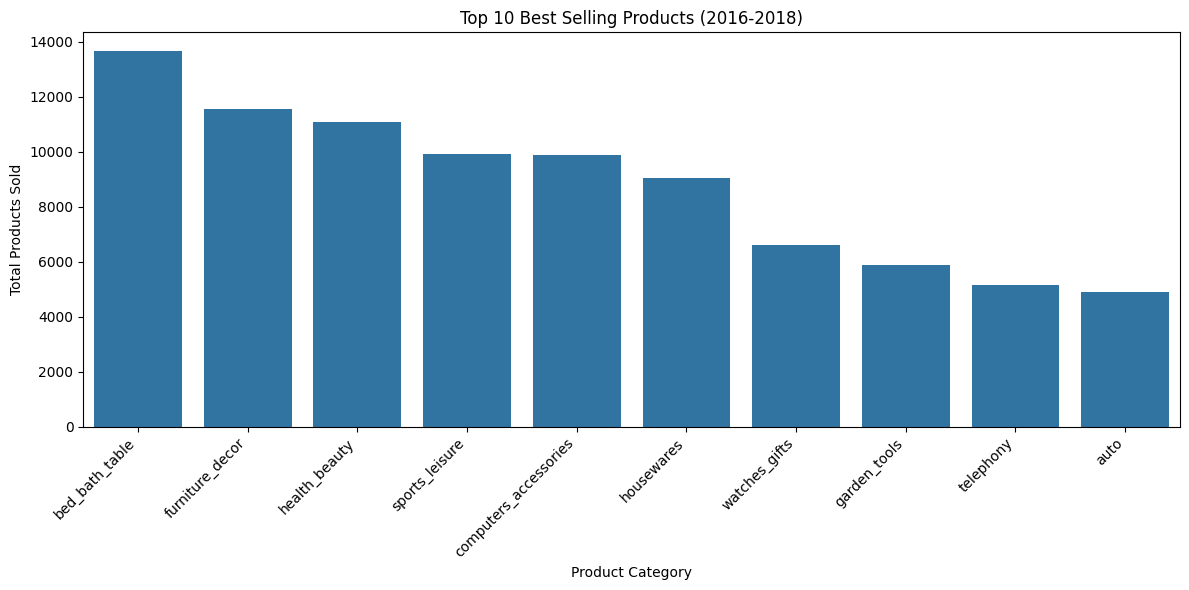

In [95]:
# plot top 10 produk terlaris

plt.figure(figsize=(12, 6))
sns.barplot(x='product_category_name_english', y='total_products_sold', data=sales_by_category.head(10))
plt.xlabel('Product Category')
plt.ylabel('Total Products Sold')
plt.title('Top 10 Best Selling Products (2016-2018)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Insight:**
- bed_bath_table adalah kategori dengan jumlah penjualan tertinggi, menunjukkan tingginya permintaan untuk perlengkapan rumah tangga.
- Kategori "furniture_decor" dan "health_beauty" juga cukup dominan, menunjukkan pelanggan juga tertarik dengan produk dekorasi dan perawatan diri.
- Kategori dengan jumlah penjualan lebih sedikit seperti "telephony" dan "auto" mungkin memiliki harga lebih tinggi, sehingga perlu dianalisis berdasarkan revenue.

**Rekomendasi**
- Fokus stok dan promosi pada kategori dengan permintaan tinggi untuk memaksimalkan keuntungan.
- Evaluasi kategori dengan penjualan rendah untuk memahami apakah strategi harga atau pemasaran perlu disesuaikan.

### Pertanyaan 2: Sebutkan 10 Kota dan state yang memiliki pelanggan terbanyak pada 2016-2018?


In [96]:
states = pd.read_excel('/content/state.xlsx')

In [97]:
# State dengan customer terbanyak

df = pd.merge(customers, states, on='customer_state', how='left')

customer_locations = df.groupby(['customer_state', 'state_name'])['customer_id'].count().reset_index()
customer_locations.rename(columns={'customer_id': 'customer_count'}, inplace=True)

# Sort by customer count
customer_locations = customer_locations.sort_values(by='customer_count', ascending=False)

print(customer_locations)


   customer_state           state_name  customer_count
25             SP            São Paulo           41746
18             RJ       Rio de Janeiro           12852
10             MG         Minas Gerais           11635
22             RS    Rio Grande do Sul            5466
17             PR               Paraná            5045
23             SC       Santa Catarina            3637
4              BA                Bahia            3380
6              DF     Distrito Federal            2140
7              ES       Espírito Santo            2033
8              GO                Goiás            2020
15             PE           Pernambuco            1652
5              CE                Ceará            1336
13             PA                 Pará             975
12             MT          Mato Grosso             907
9              MA             Maranhão             747
11             MS   Mato Grosso do Sul             715
14             PB              Paraíba             536
16        

In [98]:
# Kota dan state yang memiliki pelanggan terbanyak

top_city = df.groupby(['customer_city', 'customer_state'])['customer_id'].count().reset_index()
top_city.rename(columns={'customer_id': 'customer_count'}, inplace=True)
top_city = top_city.sort_values('customer_count', ascending=False).head(10)

# Merge with the 'states' DataFrame to get the state names
top_city = pd.merge(top_city, states, on='customer_state', how='left')

print(top_city[['customer_city', 'customer_state', 'state_name', 'customer_count']])


           customer_city customer_state         state_name  customer_count
0              sao paulo             SP          São Paulo           15540
1         rio de janeiro             RJ     Rio de Janeiro            6882
2         belo horizonte             MG       Minas Gerais            2773
3               brasilia             DF   Distrito Federal            2131
4               curitiba             PR             Paraná            1521
5               campinas             SP          São Paulo            1444
6           porto alegre             RS  Rio Grande do Sul            1379
7               salvador             BA              Bahia            1245
8              guarulhos             SP          São Paulo            1189
9  sao bernardo do campo             SP          São Paulo             938


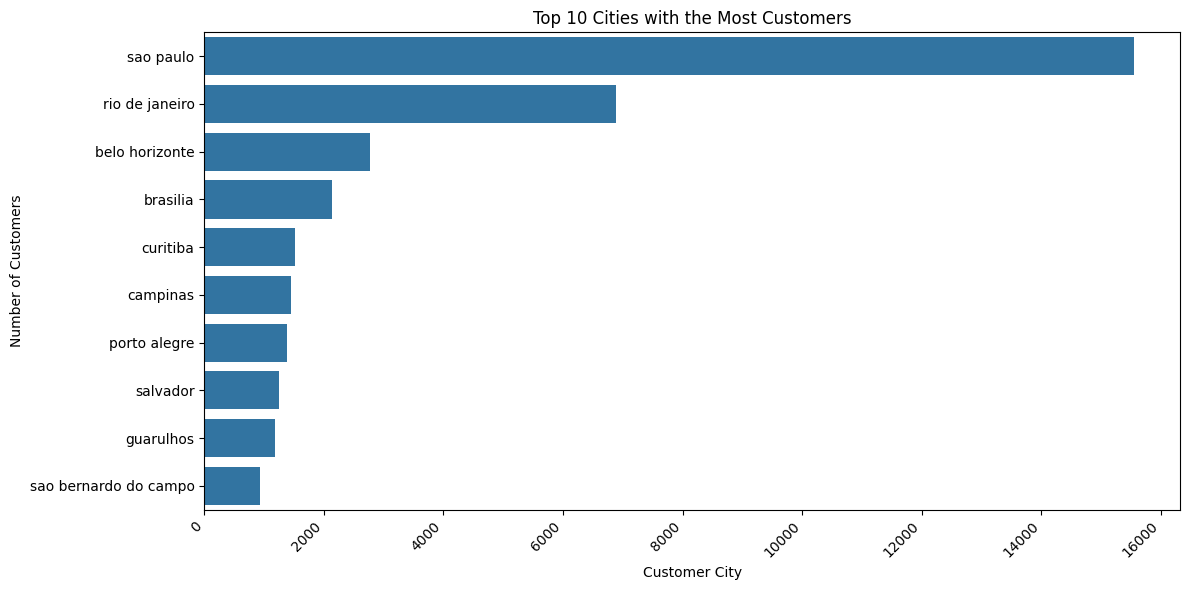

In [99]:
# plot 10 customer terbanyak berdasarkan city

plt.figure(figsize=(12, 6))
sns.barplot(x='customer_count', y='customer_city', data=top_city)
plt.xlabel('Customer City')
plt.ylabel('Number of Customers')
plt.title('Top 10 Cities with the Most Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Insight:**
- São Paulo mendominasi jumlah pelanggan, strategi pemasaran & logistik dapat terfokuskan ke kota ini.
- Kota besar seperti Rio de Janeiro & Belo Horizonte juga potensial untuk ekspansi lebih lanjut.


### Pertanyaan 3 : Bagaimana tren jumlah transaksi dan total penjualan dari tahun 2016 hingga 2018?


In [100]:
# tren transaksi penjualan perbulan dari 2016 hingga 2018

# Gabungkan dataframe yang dibutuhkan
df = pd.merge(orders, customers, on='customer_id', how='left')
df = pd.merge(df, orderitems, on='order_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')
df = pd.merge(df, productcategory, on='product_category_name', how='left')

# Filter data untuk tahun 2016-2018
df = df[(df['order_purchase_timestamp'].dt.year >= 2016) & (df['order_purchase_timestamp'].dt.year <= 2018)]

# Buat kolom bulan dan tahun
df['month'] = df['order_purchase_timestamp'].dt.month
df['year'] = df['order_purchase_timestamp'].dt.year

# Buat kolom gabungan bulan dan tahun
df['month_year'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2) # Create month_year column

# Hitung jumlah penjualan per bulan dan tahun
sales_by_month_year = df.groupby(['month_year'])['order_id'].count().reset_index() # Group by the newly created column
sales_by_month_year.rename(columns={'order_id': 'total_transaction'}, inplace=True)
sales_by_month_year

,month_year,total_transaction
0,2016-09,7
1,2016-10,379
2,2016-12,1
3,2017-01,966
4,2017-02,1998
5,2017-03,3041
6,2017-04,2697
7,2017-05,4176
8,2017-06,3611
9,2017-07,4576


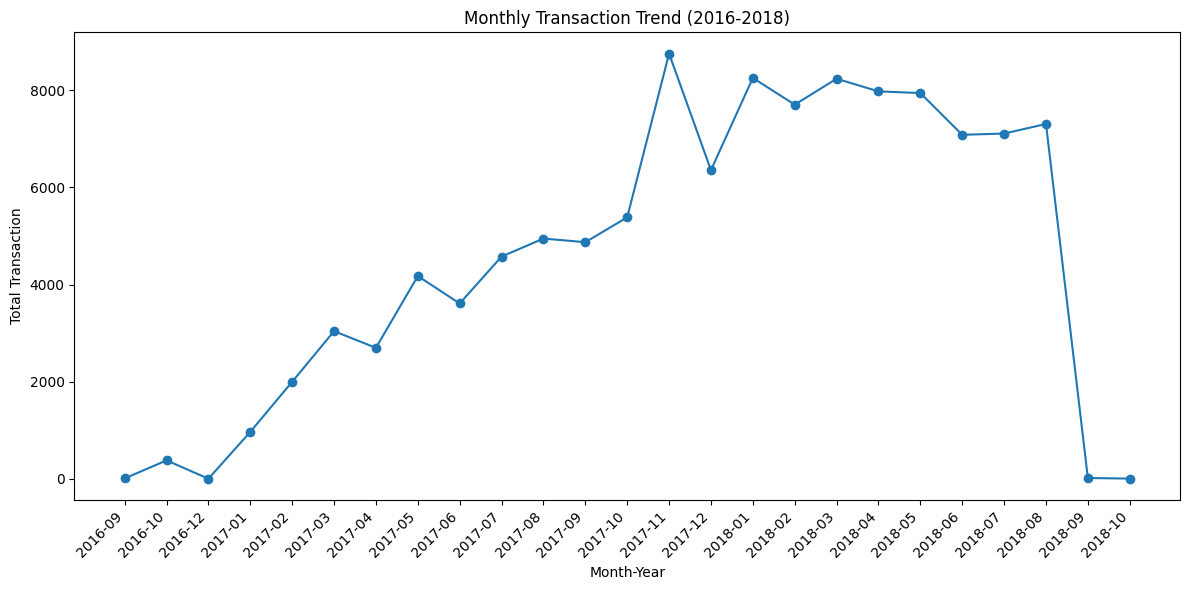

In [101]:
# plot tren transaksi penjualan perbulan

import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sales_by_month_year['month_year'], sales_by_month_year['total_transaction'], marker='o') # Added marker='o' for points
plt.xlabel('Month-Year')
plt.ylabel('Total Transaction')
plt.title('Monthly Transaction Trend (2016-2018)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [102]:
# tren penjualan berdasarkan revenuenya perbulan

# Gabungkan dataframe yang dibutuhkan
df = pd.merge(orders, customers, on='customer_id', how='left')
df = pd.merge(df, orderitems, on='order_id', how='left')

# Filter data untuk tahun 2016-2018
df = df[(df['order_purchase_timestamp'].dt.year >= 2016) & (df['order_purchase_timestamp'].dt.year <= 2018)]

# Buat kolom bulan dan tahun
df['month'] = df['order_purchase_timestamp'].dt.month
df['year'] = df['order_purchase_timestamp'].dt.year

# Hitung revenue per bulan dan tahun
revenue_by_month= df.groupby(['year', 'month'])['price'].sum().reset_index()
revenue_by_month.rename(columns={'price': 'total_revenue'}, inplace=True)

revenue_by_month

,year,month,total_revenue
0,2016,9,267.36
1,2016,10,49507.66
2,2016,12,10.90
3,2017,1,120312.87
4,2017,2,247303.02
5,2017,3,374344.30
6,2017,4,359927.23
7,2017,5,506071.14
8,2017,6,433038.60
9,2017,7,498031.48


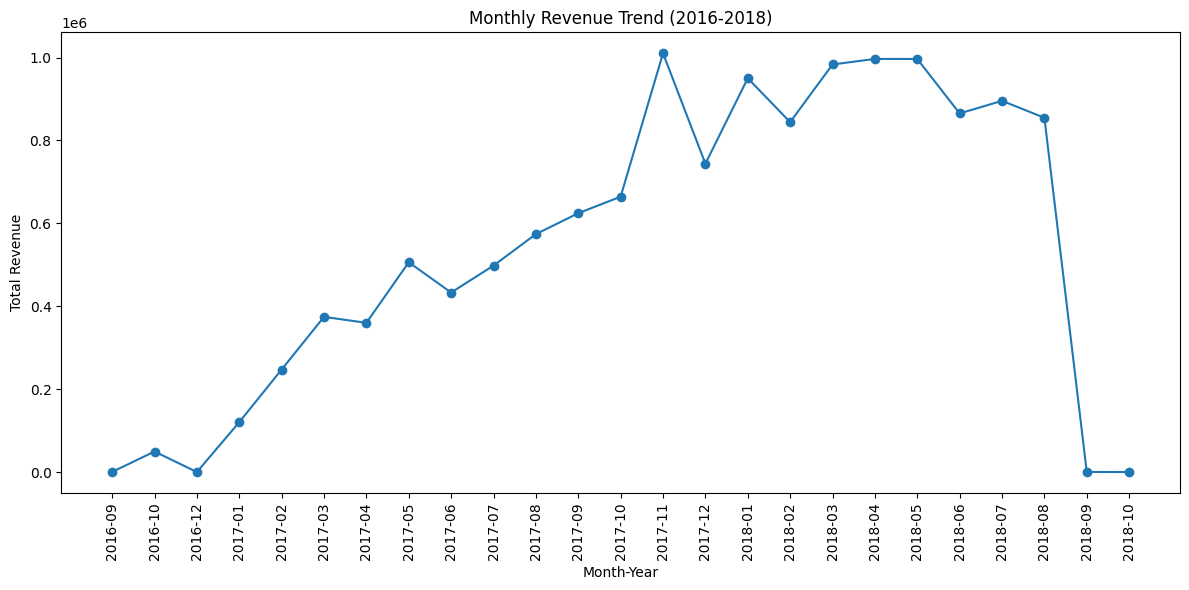

In [103]:
# plot tren penjualan berdasarkan revenuenya

# Create month-year column
revenue_by_month['month_year'] = revenue_by_month['year'].astype(str) + '-' + revenue_by_month['month'].astype(str).str.zfill(2)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(revenue_by_month['month_year'], revenue_by_month['total_revenue'], marker='o')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend (2016-2018)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Insight:**
- Tren Transaksi Bulanan (2016-2018)

1. Terjadi pertumbuhan signifikan sejak 2017, mencapai puncaknya pada akhir 2017, dengan puncak tertinggi pada bulan November 2017.
2. Setelah Agustus 2018, pada grafik jumlah transaksi turun drastis pada September dan Oktober karena data pada bulan tersebut sedikit.

- Tren Pendapatan Bulanan (2016-2018)
1. Pendapatan menunjukkan pertumbuhan stabil hingga di akhir 2017, puncak pada bulan November 2017.
2. Pola penurunan setelah pertengahan 2018.

### Pertanyaan 4 : Siapa penjual dengan total revenue tertinggi, berada di daerah mana, dan  produk terlarisnya apa?


In [104]:
state = pd.read_excel('/content/state.xlsx')

In [105]:
# 5 seller dengan revenue tertinggi

import pandas as pd
# Assuming 'df' is the merged dataframe as defined in the provided code.
# Calculate total revenue per seller
sales_by_seller = df.groupby('seller_id')['price'].sum().reset_index()
sales_by_seller.rename(columns={'price': 'total_revenue'}, inplace=True)

# Sort by total revenue and get the top 5 sellers
top_5_sellers = sales_by_seller.sort_values('total_revenue', ascending=False).head(5)

# Merge with the sellers dataframe to get location information
# Changed 'df' to 'sellers' and selected the required columns
top_5_sellers = pd.merge(top_5_sellers, sellers[['seller_id', 'seller_city', 'seller_state']], on='seller_id', how='left')

top_5_sellers[['seller_id', 'seller_city', 'seller_state', 'total_revenue']].drop_duplicates()

,seller_id,seller_city,seller_state,total_revenue
0,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,229472.63
1,53243585a1d6dc2643021fd1853d8905,lauro de freitas,BA,222776.05
2,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,200472.92
3,fa1c13f2614d7b5c4749cbc52fecda94,sumare,SP,194042.03
4,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,SP,187923.89


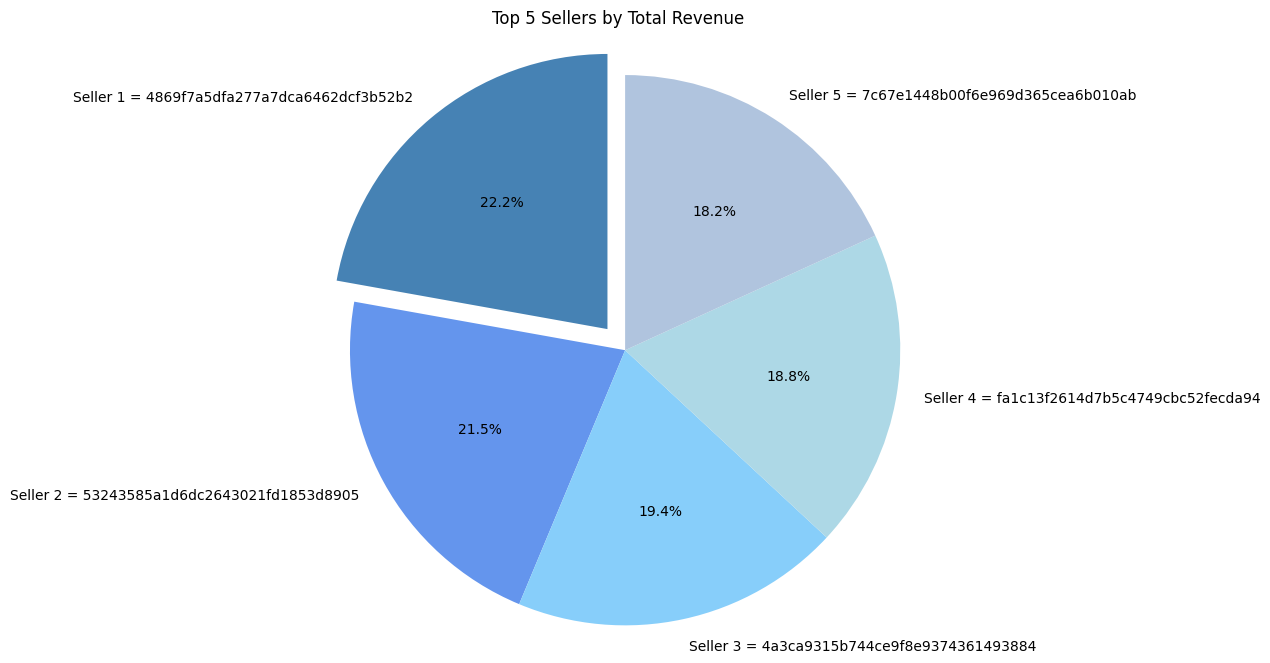

In [106]:
# plot 5 seller berdasarkan revenue

data = {'seller_id': ['Seller 1 = 4869f7a5dfa277a7dca6462dcf3b52b2', 'Seller 2 = 53243585a1d6dc2643021fd1853d8905',
                      'Seller 3 = 4a3ca9315b744ce9f8e9374361493884', 'Seller 4 = fa1c13f2614d7b5c4749cbc52fecda94',
                      'Seller 5 = 7c67e1448b00f6e969d365cea6b010ab'],
        'total_revenue': [229472.63, 222776.05, 200472.92, 194042.03, 187923.89]}
top_5_sellers = pd.DataFrame(data)


# Create the pie chart
plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0, 0, 0)  # Explode the largest slice for emphasis
colors = ['#4682B4', '#6495ED', '#87CEFA', '#ADD8E6', '#B0C4DE'] # shades of blue
plt.pie(top_5_sellers['total_revenue'], labels=top_5_sellers['seller_id'], autopct='%1.1f%%', startangle=90, explode=explode, colors=colors)
plt.title('Top 5 Sellers by Total Revenue')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')
plt.show()


In [107]:
# seller dengan revenue tertinggi, berada di daerah mana, dan produk terlarisnya apa

# Gabungkan dataframe yang dibutuhkan
df = pd.merge(orders, customers, on='customer_id', how='left')
df = pd.merge(df, orderitems, on='order_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')
df = pd.merge(df, sellers, on='seller_id', how='left')
df = pd.merge(df, productcategory, on='product_category_name', how='left')

# Hitung total penjualan per penjual
sales_by_seller = df.groupby('seller_id')['price'].sum().reset_index()
sales_by_seller.rename(columns={'price': 'total_revenue'}, inplace=True)

# Urutkan berdasarkan total penjualan dan ambil 5 penjual teratas
top_5_sellers = sales_by_seller.sort_values('total_revenue', ascending=False).head(5)

# Gabungkan kembali dengan dataframe utama untuk mendapatkan informasi lokasi dan produk
top_5_sellers = pd.merge(top_5_sellers, df[['seller_id', 'seller_city', 'seller_state', 'product_category_name_english']], on='seller_id', how='left')

top_5_sellers[['seller_id', 'seller_city', 'seller_state', 'product_category_name_english', 'total_revenue']].drop_duplicates()


,seller_id,seller_city,seller_state,product_category_name_english,total_revenue
0,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,auto,229472.63
1,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,watches_gifts,229472.63
3,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,health_beauty,229472.63
9,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,cool_stuff,229472.63
29,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,computers_accessories,229472.63
37,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,electronics,229472.63
40,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,audio,229472.63
73,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,sports_leisure,229472.63
130,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,telephony,229472.63
310,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,consoles_games,229472.63


**Insight:**
- Seller 1 saat ini memimpin dalam revenue, namun perbedaannya tidak terlalu jauh dari seller lainnya. Untuk meningkatkan daya saing, seller yang berada di posisi lebih rendah dapat meningkatkan pemasaran, meningkatkan variasi produk, atau menyesuaikan harga untuk menarik lebih banyak pembeli.
- Berdasarkan produk yang dijual, setiap seller cenderung menjual produk yang berbeda-beda, sehingga dapat diartikan bahwa **setiap seller memiliki segmentasi pasar, strategi penjualan, serta keunggulan kompetitif yang unik**.
- Mayoritas Seller dengan revenue terbanyak berasal dari state of Sao Paulo,  maka hal ini menunjukkan bahwa São Paulo merupakan pusat ekonomi yang dominan dalam perdagangan e-commerce di wilayah tersebut.


### Pertanyaan 5 : Berdasarkan analisis teks dari ulasan pelanggan tahun 2016-2018, komentar apa yang paling sering disebut dalam ulasan?

In [108]:
# isi comment terbanyak pada orderreview

review_comment_counts = orderreviews['review_comment_message'].value_counts()

review_comment_counts.head(10)

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
Otimo,99
otimo,96
Ótimo,77
Ótimo,74


**Insight:**
- Kata-kata seperti "Muito bom" (Sangat baik), "Bom" (Baik), "Ótimo" (Luar biasa), dan "Recomendo" (Saya rekomendasikan) menunjukkan bahwa mayoritas pelanggan puas dengan produk dan layanan yang mereka terima.
- Meskipun komentar positif mendominasi, komentar negatif tetap perlu dianalisis untuk memahami kendala yang dihadapi pelanggan. Dengan begitu, seller dapat melakukan perbaikan layanan dan produk untuk meningkatkan kepuasan pelanggan secara keseluruhan.

## Analisis Lanjutan

### Pertanyaan : Bagaimana analisis RFM untuk mengidentifikasi pelanggan yang VIP, Loyal, At Risk to Churn, dan Churn berdasarkan transaksi terakhir mereka?

In [109]:
#  analisis RFM untuk customer yang beresiko churn

# Calculate Recency
now = pd.Timestamp.now() # Get the current date and time
df['Recency'] = (now - pd.to_datetime(df['order_purchase_timestamp'])).dt.days

# Calculate Frequency
frequency = df.groupby('customer_id')['order_id'].count().reset_index()
frequency.rename(columns={'order_id': 'Frequency'}, inplace=True)
df = pd.merge(df, frequency, on='customer_id', how='left')

# Calculate Monetary Value
monetary = df.groupby('customer_id')['price'].sum().reset_index()
monetary.rename(columns={'price': 'Monetary'}, inplace=True)
df = pd.merge(df, monetary, on='customer_id', how='left')


# Define RFM quartiles
quantiles = df[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

# Function to assign RFM scores
def rfm_score(x, c):
    if x <= quantiles[c][0.25]:
        return 4
    elif x <= quantiles[c][0.5]:
        return 3
    elif x <= quantiles[c][0.75]:
        return 2
    else:
        return 1

# Assign RFM scores to each customer
df['R'] = df['Recency'].apply(lambda x: rfm_score(x, 'Recency'))
df['F'] = df['Frequency'].apply(lambda x: rfm_score(x, 'Frequency'))
df['M'] = df['Monetary'].apply(lambda x: rfm_score(x, 'Monetary'))
df['RFM'] = df['R'].astype(str) + df['F'].astype(str) + df['M'].astype(str)

# mencoba customer yang berpotensi churn dengan RFM score '111'
churn_risk_customers = df[df['RFM'] == '111']

# Display RFM scores for at-risk customers
print(churn_risk_customers[['customer_id', 'Recency', 'Frequency', 'Monetary', 'RFM']])



                             customer_id  Recency  Frequency  Monetary  RFM
10      494dded5b201313c64ed7f100595b95c     2853          2    198.00  111
11      494dded5b201313c64ed7f100595b95c     2853          2    198.00  111
83      388025bec8128ff20ec1a316ed4dcf02     2879          5    190.00  111
84      388025bec8128ff20ec1a316ed4dcf02     2879          5    190.00  111
85      388025bec8128ff20ec1a316ed4dcf02     2879          5    190.00  111
...                                  ...      ...        ...       ...  ...
112906  6b0dd7d5c825e4239c42c72227fd82f9     2791          2    319.88  111
113237  6eac56572e999fbdb8f2dfef5403438f     2821          2    780.00  111
113238  6eac56572e999fbdb8f2dfef5403438f     2821          2    780.00  111
113395  609b9fb8cad4fe0c7b376f77c8ab76ad     2767          2    712.00  111
113396  609b9fb8cad4fe0c7b376f77c8ab76ad     2767          2    712.00  111

[2413 rows x 5 columns]


In [110]:
# kategori customer berdasarkan RFMnya dengan kategori VIP, Loyal, At Risk, atau Churn

def rfm_segment(rfm):
    if rfm in ['444', '434', '443', '433', '344', '334']:
        return 'VIP'
    elif rfm in ['333', '343', '332', '233', '243', '323', '234']:
        return 'Loyal'
    elif rfm in ['111', '112', '121', '122', '131', '211','221','212','141','114','113']:
        return 'At Risk'  # Customers at risk of churning
    else:
        return 'Churn'  # Customers who have churned

# Apply the segmentation function
df['Segment'] = df['RFM'].apply(rfm_segment)

df[['customer_id', 'Recency', 'Frequency', 'Monetary', 'RFM', 'Segment']]

,customer_id,Recency,Frequency,Monetary,RFM,Segment
0,9ef432eb6251297304e76186b10a928d,2715,1,29.99,244,Churn
1,b0830fb4747a6c6d20dea0b8c802d7ef,2419,1,118.70,442,Churn
2,41ce2a54c0b03bf3443c3d931a367089,2405,1,159.90,442,Churn
3,f88197465ea7920adcdbec7375364d82,2667,1,45.00,244,Churn
4,8ab97904e6daea8866dbdbc4fb7aad2c,2580,1,19.90,344,VIP
...,...,...,...,...,...,...
113420,1fca14ff2861355f6e5f14306ff977a7,2587,1,174.90,341,Churn
113421,1aa71eb042121263aafbe80c1b562c9c,2750,1,205.99,141,At Risk
113422,b331b74b18dc79bcdf6532d51e1637c1,2616,2,359.98,211,At Risk
113423,b331b74b18dc79bcdf6532d51e1637c1,2616,2,359.98,211,At Risk


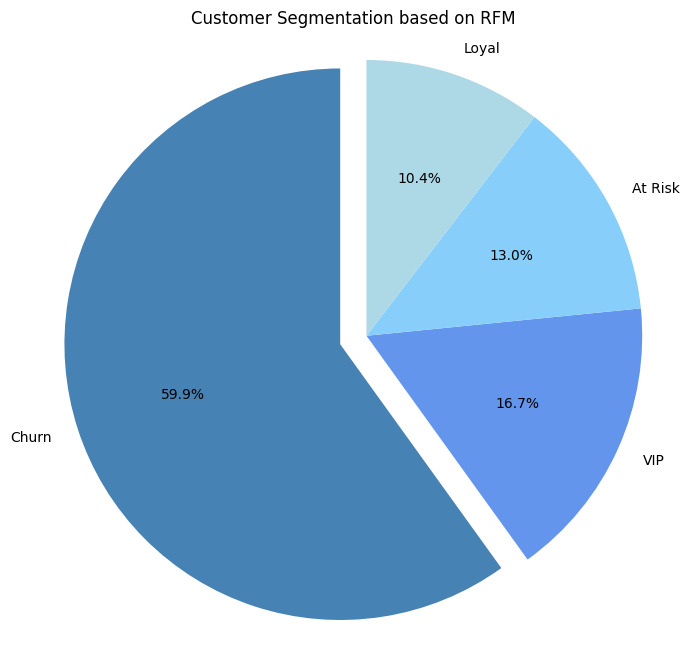

In [111]:
# visualisasi kategori berdasarkan RFM nya


# Count the occurrences of each segment
segment_counts = df['Segment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
colors = ['#4682B4', '#6495ED', '#87CEFA', '#ADD8E6'] # Shades of blue
explode = (0.1, 0, 0, 0)  # explode the largest slice
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors)
plt.title('Customer Segmentation based on RFM')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


In [112]:
# jumlah cust masing-masing kategori VIP, Loyal, At Risk, atau Churn

# Assuming 'df' DataFrame is already created with RFM segments as in the previous code.

# Count the number of customers in each segment
segment_counts = df['Segment'].value_counts()

# Print the counts for each segment
segment_counts

,count
Segment,
Churn,67977
VIP,18889
At Risk,14736
Loyal,11823


In [113]:
# segmentasi VIP, Loyal, At Risk, atau Churn berdasarkan tahunnya

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Extract the year from the order purchase timestamp
df['order_purchase_year'] = df['order_purchase_timestamp'].dt.year

# Group by year and segment, then count the customers in each segment for each year
segmented_customers_by_year = df.groupby(['order_purchase_year', 'Segment'])['customer_id'].count().reset_index()
segmented_customers_by_year.rename(columns={'customer_id': 'customer_count'}, inplace=True)

# Display the segmented customer counts by year
segmented_customers_by_year


,order_purchase_year,Segment,customer_count
0,2016,At Risk,164
1,2016,Churn,223
2,2017,At Risk,13873
3,2017,Churn,32412
4,2017,Loyal,5101
5,2018,At Risk,699
6,2018,Churn,35342
7,2018,Loyal,6722
8,2018,VIP,18889


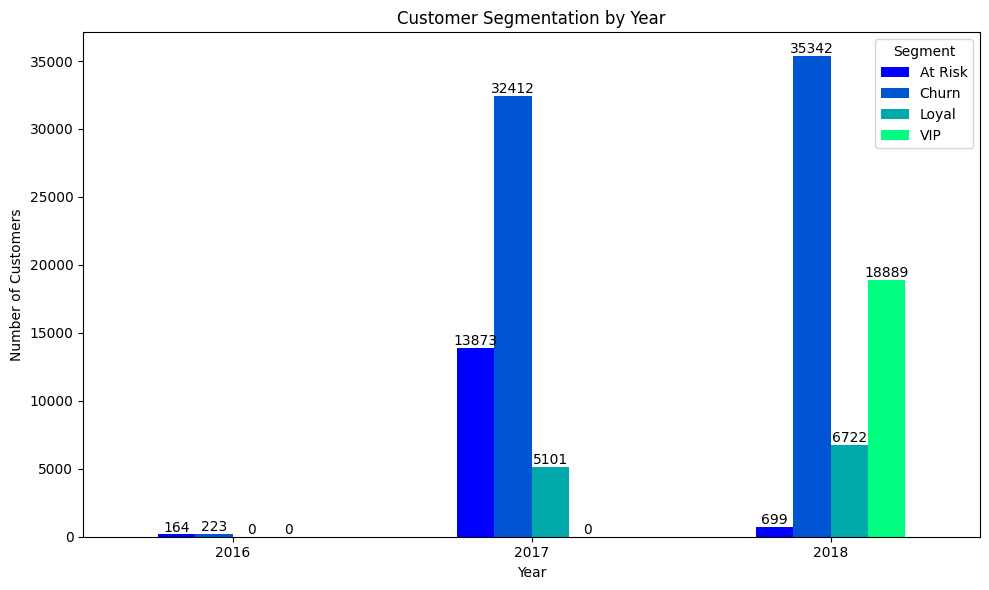

In [117]:
# visualiasasi segmentasi VIP, Loyal, At Risk, atau Churn berdasarkan tahunnya

# Pivot the table for easier plotting
segmented_customers_pivot = segmented_customers_by_year.pivot(index='order_purchase_year', columns='Segment', values='customer_count')

# Create the bar chart
ax = segmented_customers_pivot.plot(kind='bar', figsize=(10, 6), colormap='winter')

# Customize the chart
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation by Year')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Segment')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.tight_layout()
plt.show()


In [115]:
# daerah dengan churn terbanyak

# Group by customer city and state, then count the number of customers in each segment
churn_by_location = df[df['Segment'] == 'At Risk'].groupby(['customer_city', 'customer_state'])['customer_id'].count().reset_index()
churn_by_location.rename(columns={'customer_id': 'churn_count'}, inplace=True)

# Sort by churn count in descending order to find areas with the most churn
churn_by_location_sorted = churn_by_location.sort_values('churn_count', ascending=False)

# Display the top 10 locations with the highest churn
print(churn_by_location_sorted.head(10))

       customer_city customer_state  churn_count
1394       sao paulo             SP         2056
1226  rio de janeiro             RJ         1149
173   belo horizonte             MG          389
218         brasilia             DF          278
1157    porto alegre             RS          258
278         campinas             SP          229
448         curitiba             PR          227
1260        salvador             BA          208
592        guarulhos             SP          161
963          niteroi             RJ          139


<ipython-input-119-677a03b28b4e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='churn_count', y='customer_city', data=top_10_locations, palette=colors)


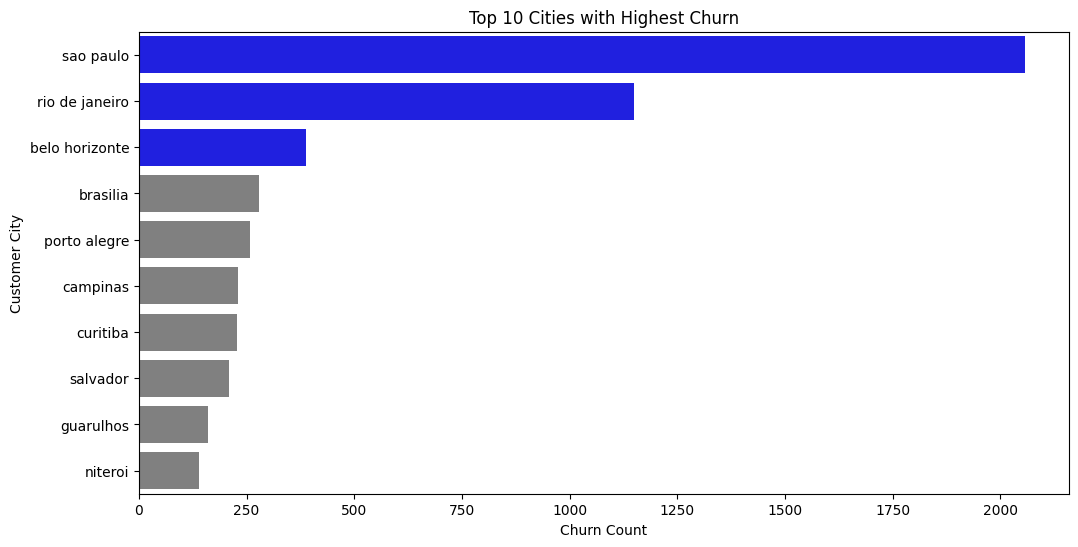

In [119]:
#  plot 10 kota dengan churn terbanyak

top_10_locations = churn_by_location_sorted.head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))

# Set colors for the top 3 and the rest
colors = ['blue'] * 3 + ['gray'] * 7

sns.barplot(x='churn_count', y='customer_city', data=top_10_locations, palette=colors)

# Customize the plot
plt.xlabel('Churn Count')
plt.ylabel('Customer City')
plt.title('Top 10 Cities with Highest Churn')
plt.show()


**Insight :**
- Sao Paulo dan Rio de Janeiro memiliki jumlah churn tertinggi secara signifikan dibandingkan kota lainnya. Selain itu, Sao Paulo dan Rio de Janeiro termasuk kota dengan customer terbanyak, artinya apabila tidak ditangani dengan benar hal ini akan semakin memperbanyak customer yang churn. Maka, fokus utama strategi retensi pelanggan harus diarahkan ke Sao Paulo dan Rio de Janeiro.
- Churn pada tahun 2017- 2018 cukup tinggi. Selain itu, segmen pelanggan At Risk to Churn juga cukup tinggi, yang berarti ada banyak pelanggan yang berpotensi churn di tahun-tahun mendatang. Maka, perlu ada program khusus untuk mencegah churn lebih lanjut, khususnya pada pelanggan yang berada dalam kategori "At Risk".
- Churn mendominasi dengan 59.9%, menunjukkan bahwa lebih dari setengah pelanggan telah berhenti menggunakan layanan. Persentase churn yang sangat tinggi menunjukkan bahwa strategi retensi pelanggan kurang efektif. Perusahaan perlu memperkuat program loyalitas dan intervensi dini untuk mencegah churn.

## Conclusion

- 10 produk dengan jumlah penjualan terbanyak dalam periode 2016-2018, yaitu: bed_bath_table, furniture_decor,health_beauty, sports_leisure, computers_accessories, housewares, watches_gifts, garden_tools,telephony, auto.
 Produk terlaris didominasi produk rumah tangga dan dekorasi. Selain itu, health_beauty dan sports_leisure juga memiliki permintaan tinggi.

2. 10 Kota dan state yang memiliki pelanggan terbanyak pada 2016-2018, yaitu: Sao Paulo, Rio de Janeiro, Belo Horizonte, Brasilia, Curitiba, Campinas, Porto Alegre, Salvador, Guarulhos, Sao Bernardo do Campo

3.  Tren jumlah transaksi dan total penjualan dari tahun 2016 hingga 2018:
- Tren transaksi penjualan terjadi pertumbuhan signifikan sejak 2017, mencapai puncaknya pada akhir 2017, dengan puncak tertinggi pada bulan November 2017.
- Tren total penjualan(revenue) menunjukkan pertumbuhan stabil hingga di akhir 2017, puncak pada bulan November 2017.

4. Penjual dengan total revenue tertinggi selama 2016-2018, berada di daerah guariba city, State of Sao Paulo dengan seller_id '4869f7a5dfa277a7dca6462dcf3b52b2'. Penjual tersebut memiliki kategori produk terlaris yaitu : Auto, Watches & Gifts
, Health & Beauty, Cool Stuff, Computers Accessories, Electronics, Audio, Sports & Leisure, Telephony, Consoles & Games dengan total revenue 229472.63.
5. Berdasarkan analisis teks dari ulasan pelanggan tahun 2016-2018, komentar  yang paling sering disebut dalam ulasan yaitu kata-kata seperti "Muito bom" (Sangat baik), "Bom" (Baik), "Ótimo" (Luar biasa), dan "Recomendo" (Saya rekomendasikan)
6. analisis RFM untuk mengidentifikasi pelanggan yang VIP, Loyal, At Risk to Churn, dan Churn berdasarkan transaksi terakhir menunjukkan bahwa:
-  VIP Customers adalah pelanggan dengan transaksi terbaru, sering berbelanja, dan memiliki nilai transaksi tinggi. Mereka harus dijaga dengan program eksklusif.
- Loyal Customers sering berbelanja tetapi mungkin tidak dalam waktu dekat. Penawaran khusus dapat meningkatkan keterlibatan mereka secara berlanjut.
- At Risk to Churn adalah pelanggan yang dulunya aktif tetapi mulai jarang berbelanja. Strategi re-engagement diperlukan untuk menarik mereka kembali.
- Churned Customers tidak bertransaksi dalam waktu lama. Promosi khusus atau diskon besar bisa menjadi cara untuk mengaktifkan mereka kembali.
- Sao Paulo dan Rio de Janeiro memiliki jumlah churn tertinggi
- Churn pada tahun 2017- 2018 cukup tinggi.
- Churn customer mendominasi dengan 59.9%, menunjukkan bahwa lebih dari setengah pelanggan telah berhenti menggunakan layanan.